Снежко Лев

Разработать программу вычисления и визуализации морфологического спектра для бинарных и полутоновых изображений для различных структурирующих элементов (структурирующий элемент задается в виде аргумента).

In [3]:
import numpy as np

def complement(f):
    return 1 - f


def padding(zeros, a, b, c):
    padded = (a.shape[0] + b.shape[0], a.shape[1] + b.shape[1])
    res = np.zeros(padded) if zeros else np.ones(padded)
    res[c[0]:c[0]+a.shape[0], c[1]:c[1]+a.shape[1]] = a
    return res


def dilation(a, b, c = None):
    if c is None:
        c = [b.shape[0] // 2, b.shape[1] // 2]
    padded = padding(True, a, b, c)
    return np.array([[np.max(padded[i:i+b.shape[0],j:j+b.shape[1]][b]) for j in range(a.shape[1])] for i in range(a.shape[0])])


def erosion(a, b, c = None):
    if c is None:
        c = [b.shape[0] // 2, b.shape[1] // 2]
    padded = padding(False, a, b, c)
    return np.array([[np.min(padded[i:i+b.shape[0],j:j+b.shape[1]][b]) for j in range(a.shape[1])] for i in range(a.shape[0])])


def opening(a, b, c = None):
    return dilation(erosion(a, b, c), b, c)


def closing(a, b, c = None):
    return erosion(dilation(a, b, c), b, c)

Демонстрация работы c полутоновыми изображениями

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.any(arr < 255, axis = 2)

def load_image_gray(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.sum(arr, axis=2)/(255 * 3)

im1 = load_image_gray("svin.jpg")

mask1 = load_image("circle.png")
mask2 = load_image("cross.png")

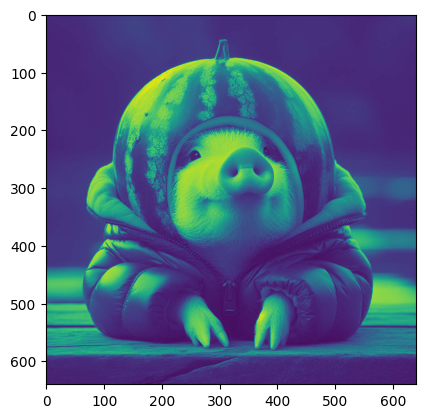

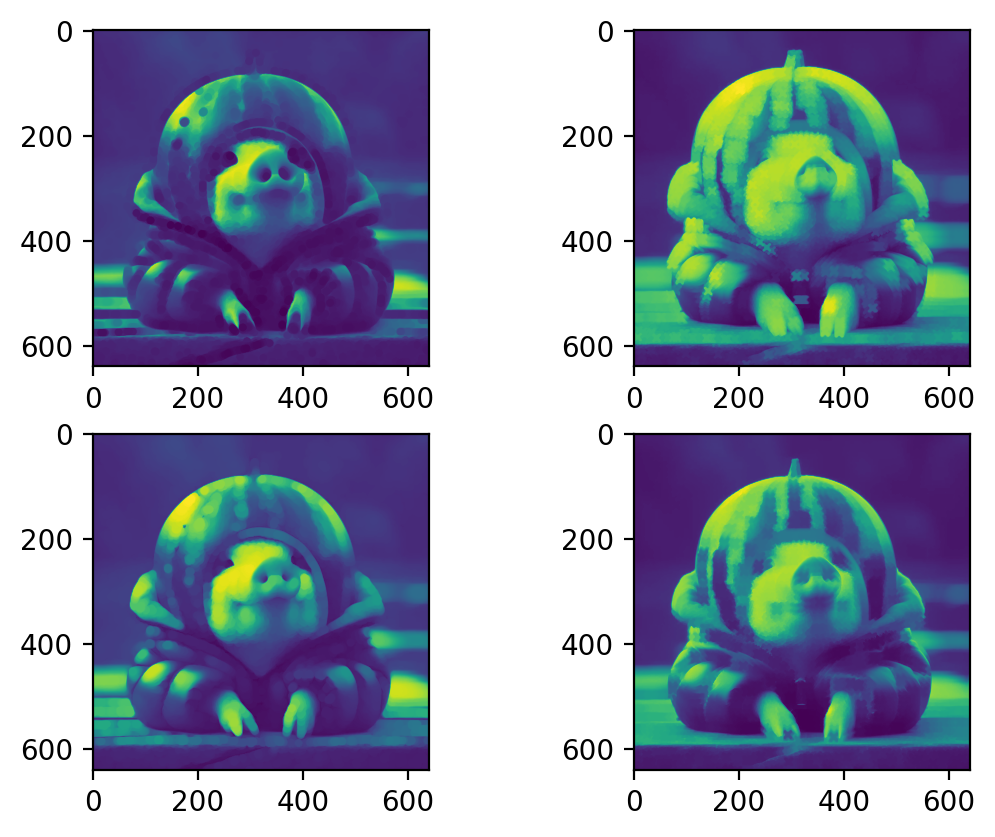

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.any(arr < 255, axis = 2)

def load_image_gray(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.sum(arr, axis=2)/(255 * 3)

im1 = load_image_gray("svin.jpg")

mask1 = load_image("circle.png")
mask2 = load_image("cross.png")

plt.imshow(im1)
plt.show()
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(erosion(im1, mask1))
plt.subplot(2, 2, 2)
plt.imshow(dilation(im1, mask2))
plt.subplot(2, 2, 3)
plt.imshow(opening(im1, mask1))
plt.subplot(2, 2, 4)
plt.imshow(closing(im1, mask2))
plt.show()

In [6]:
im2 = load_image_gray("tree.png")

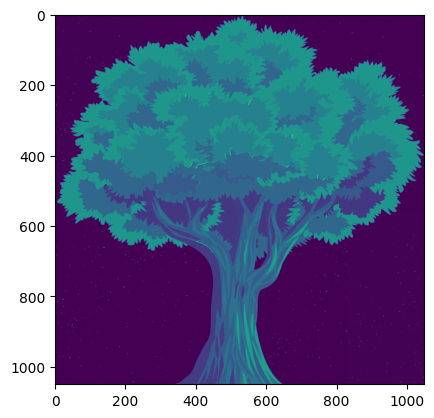

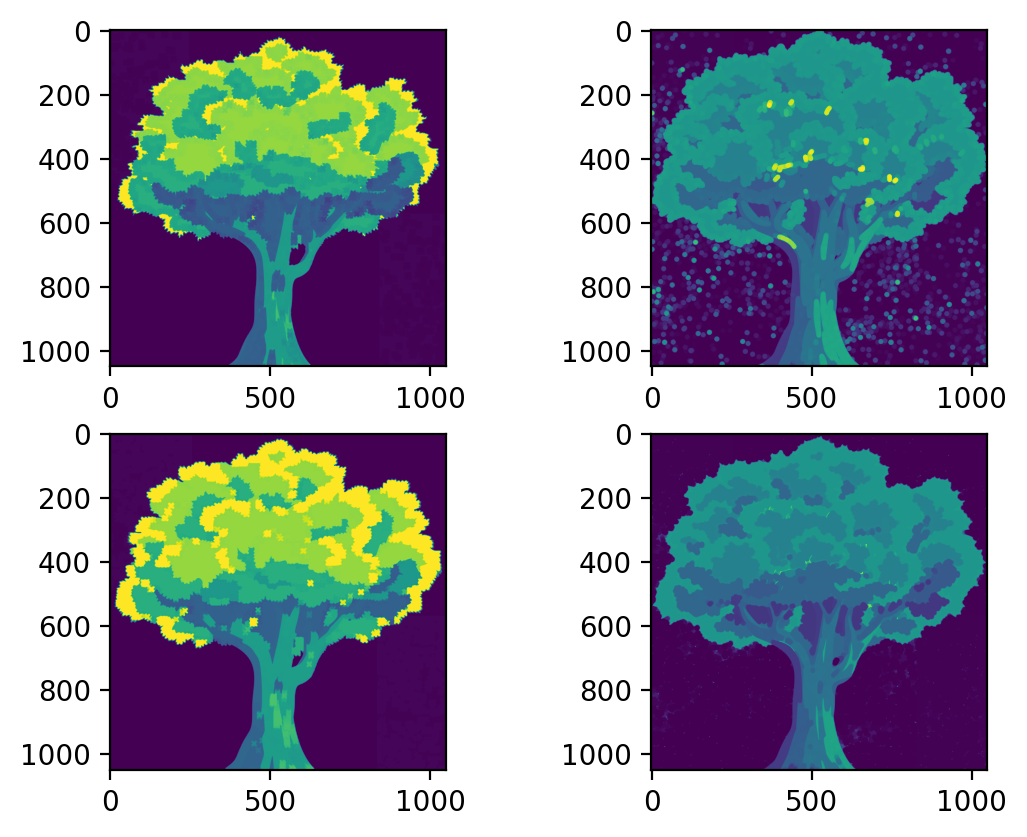

In [7]:
plt.imshow(im2)
plt.show()
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(erosion(im2, mask2))
plt.subplot(2, 2, 2)
plt.imshow(dilation(im2, mask1))
plt.subplot(2, 2, 3)
plt.imshow(opening(im2, mask2))
plt.subplot(2, 2, 4)
plt.imshow(closing(im2, mask1))
plt.show()

Вычисление морфорлогического спекра

In [8]:
#Разница изображений
def difference(a, b):
    res = a - b
    res[res < 0] = 0
    return res

#Сферические маски
def dist1(u, v):
    return np.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)

def dist2(u, v):
    return np.abs(u[0] - v[0]) + np.abs(u[1] - v[1])

def dist3(u, v):
    return (np.abs(u[0] - v[0])**1.5 + np.abs(u[1] - v[1])**1.5)**(2/3)

#Маска радиуса r
def sphere(r, dist):
    return np.array([[dist([i, j], [r, r]) <= r for j in range(2*r+1)] for i in range(2*r+1)])

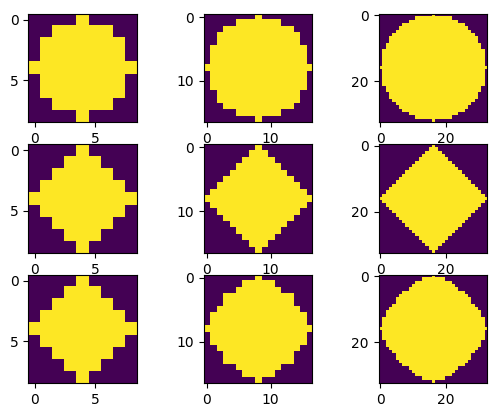

In [9]:
plt.figure(dpi=100)

plt.subplot(3, 3, 1)
plt.imshow(sphere(4, dist1))
plt.subplot(3, 3, 2)
plt.imshow(sphere(8, dist1))
plt.subplot(3, 3, 3)
plt.imshow(sphere(16, dist1))

plt.subplot(3, 3, 4)
plt.imshow(sphere(4, dist2))
plt.subplot(3, 3, 5)
plt.imshow(sphere(8, dist2))
plt.subplot(3, 3, 6)
plt.imshow(sphere(16, dist2))

plt.subplot(3, 3, 7)
plt.imshow(sphere(4, dist3))
plt.subplot(3, 3, 8)
plt.imshow(sphere(8, dist3))
plt.subplot(3, 3, 9)
plt.imshow(sphere(16, dist3))

plt.show()

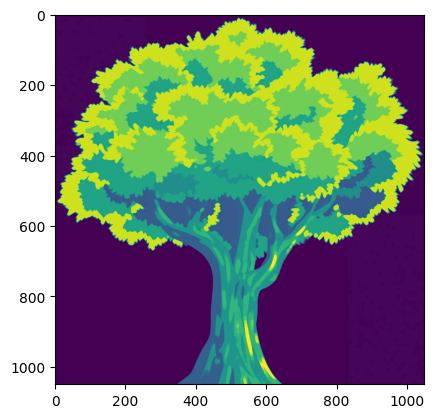

In [10]:
plt.figure(dpi=100)
plt.imshow(opening(im2, sphere(4, dist3)))
plt.show()

In [11]:
#Рассчёт положительных частот
def positive_freq(a, dist):
    freqs = []
    prev_im = a
    s = 1
    r = 1
    while s != 0:
        new_im = opening(prev_im, sphere(r, dist))
        s = np.sum(difference(prev_im, new_im))
        r += 1
        freqs.append(s)
        prev_im = new_im
    return freqs

#Рассчёт негативных частот
def negative_freq(a, dist):
    freqs = []
    prev_im = a
    s = 1
    r = 1
    while s != 0:
        new_im = closing(prev_im, sphere(r, dist))
        s = np.sum(difference(new_im, prev_im))
        r += 1
        freqs.append(s)
        prev_im = new_im
    return freqs

#Совместно
def all_freq(a, dist):
    pos = positive_freq(a, dist)
    neg = negative_freq(a, dist)
    index = range(-len(neg),len(pos))
    neg.reverse()
    neg.extend(pos)
    return (index, neg)


KeyboardInterrupt: 

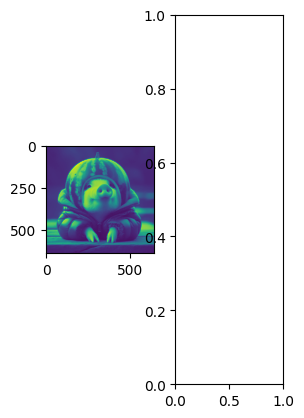

In [12]:
imags = [im1, im2, load_image('im2.png'), load_image('im1.png')]
dists = [dist1, dist2, dist3]

for im in imags:
    plt.figure(dpi=100)
    plt.subplot(1, len(dists) + 1, 1)
    plt.imshow(im)
    for j in range(len(dists)):
        plt.subplot(1, len(dists) + 1, 2 + j)
        index, value = all_freq(im, dists[j])
        plt.plot(index, value)
    plt.show()